# Initialization

Connect to Google Drive:

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# %cd '/content/drive/MyDrive/GitHub/emotion-dectection-from-text'

Preparing necessary packages:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from joblib import dump

from preset_function import evaluate_model, draw_learning_curve, load_processed_data

X_train_bow, X_test_bow, X_train_tfidf, X_test_tfidf, \
    X_train_bow_L1, X_test_bow_L1, X_train_tfidf_L1, X_test_tfidf_L1= load_processed_data('input')
    
y_train, y_test = load_processed_data('output')

%matplotlib inline

## Select dataset

At first, we will choose the dataset to be used for training and testing the model

In [6]:
X_train = X_train_bow
X_test = X_test_bow

# Basic training

We define the model with the default parameters and train it.

In [7]:
DT = DecisionTreeClassifier()
DT.fit(X_train_bow, y_train)

DecisionTreeClassifier()

Getting prediction in the training set and then evaluate it

Score of on train are:
	- Accuracy score: 0.9927
	- Micro F1 score: 0.9927
	- Macro F1 score: 0.9906
Score of on test are:
	- Accuracy score: 0.8253
	- Micro F1 score: 0.8253
	- Macro F1 score: 0.7969


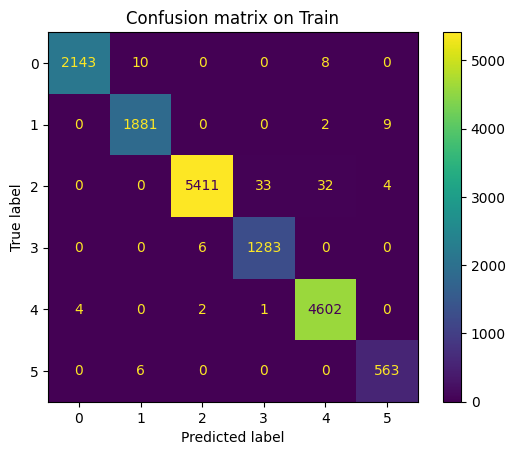

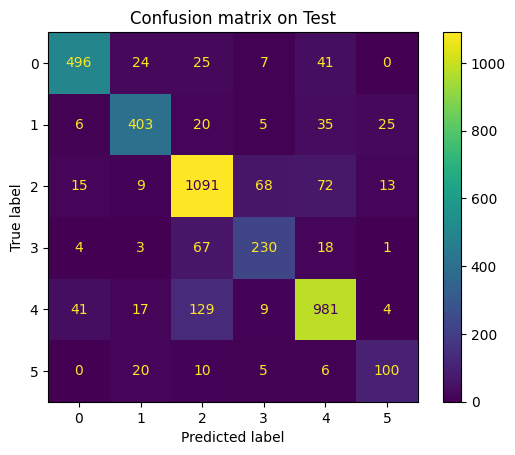

In [8]:
evaluate_model(DT, X_train_bow, X_test_bow, y_train, y_test, include_training=True)

As you can see, the model is overfitting

We will draw the learning curve of the model to check the aforementioned statement

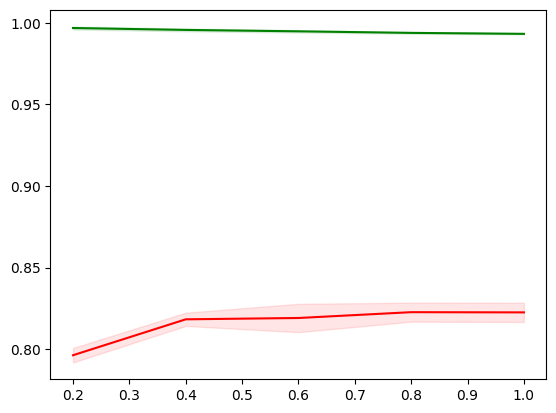

In [6]:
draw_learning_curve(DT, X_train_bow, y_train)

The learning curve proves that this model is indeed overfitting

### Single tuning

This part will examine the best range for each parameters

#### Max_depth

In [7]:
# Setting the possible value for max depth
max_depth_list = [20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]

trs_list = list()
cvs_list = list()

for max_depth in max_depth_list:
    # Define model for each max_depth
    dt_model = DecisionTreeClassifier(max_depth=max_depth)
    dt_model.fit(X_train_bow, y_train)
    
    # Calculate the cross validation score
    train_score = accuracy_score(y_train, dt_model.predict(X_train_bow))
    cvs_score = np.mean(cross_val_score(dt_model, X_train_bow, y_train, cv=5, n_jobs=-1))
    
    trs_list.append(train_score)
    cvs_list.append(cvs_score)

[Text(0, 0, '20'),
 Text(1, 0, '50'),
 Text(2, 0, '100'),
 Text(3, 0, '200'),
 Text(4, 0, '500'),
 Text(5, 0, '1000'),
 Text(6, 0, '2000'),
 Text(7, 0, '5000'),
 Text(8, 0, '10000'),
 Text(9, 0, '15000')]

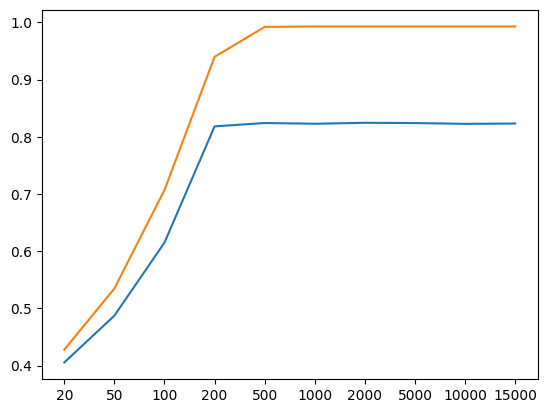

In [8]:
# Draw the plot for max depth
fig = sns.lineplot(x=list(range(len(max_depth_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_depth_list))), y=trs_list)
fig.set_xticks(range(len(max_depth_list)))
fig.set_xticklabels(max_depth_list)

The plot shows that max_depth around 200 would be good

#### Min_samples_split

In [7]:
# Setting the possible value for max depth
min_samples_split_list = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]

trs_list = list()
cvs_list = list()

for min_samples_split in min_samples_split_list:
    # Define model for each max_depth
    dt_model = DecisionTreeClassifier(max_depth=276, min_samples_split=min_samples_split)
    dt_model.fit(X_train_bow, y_train)
    
    # Calculate the cross validation score
    train_score = accuracy_score(y_train, dt_model.predict(X_train_bow))
    cvs_score = np.mean(cross_val_score(dt_model, X_train_bow, y_train, cv=5, n_jobs=-1))
    
    trs_list.append(train_score)
    cvs_list.append(cvs_score)

[Text(0, 0, '10'),
 Text(1, 0, '25'),
 Text(2, 0, '50'),
 Text(3, 0, '100'),
 Text(4, 0, '200'),
 Text(5, 0, '500'),
 Text(6, 0, '1000'),
 Text(7, 0, '2000'),
 Text(8, 0, '5000')]

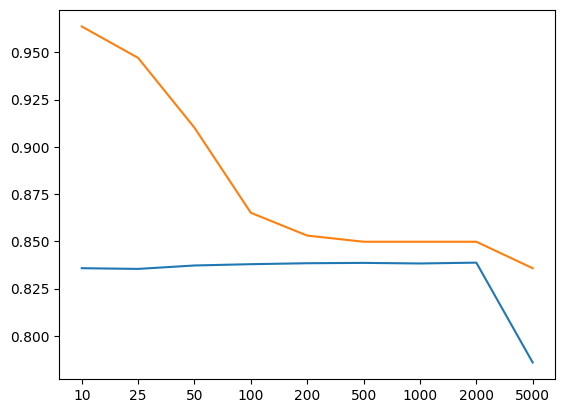

In [8]:
# Draw the plot for max depth
fig = sns.lineplot(x=list(range(len(min_samples_split_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(min_samples_split_list))), y=trs_list)
fig.set_xticks(range(len(min_samples_split_list)))
fig.set_xticklabels(min_samples_split_list)

From the plot, we can see that the best min_samples_split is close to 2000.

#### Min_samples_leaf

First, we draw the plot for the min_samples_leaf parameter

In [ ]:
# Setting the min sample leaf range
min_samples_leaf_list = [1, 5, 10, 25, 50, 75, 100]
trs_list = list()
cvs_list = list()

for min_samples_leaf in min_samples_leaf_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
  dt_model.fit(X_train_bow, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train_bow))
  cv_score = np.mean(cross_val_score(dt_model, X_train_bow, y_train, cv=5, n_jobs=-1))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

[Text(0, 0, '1'),
 Text(1, 0, '5'),
 Text(2, 0, '10'),
 Text(3, 0, '25'),
 Text(4, 0, '50'),
 Text(5, 0, '75'),
 Text(6, 0, '100')]

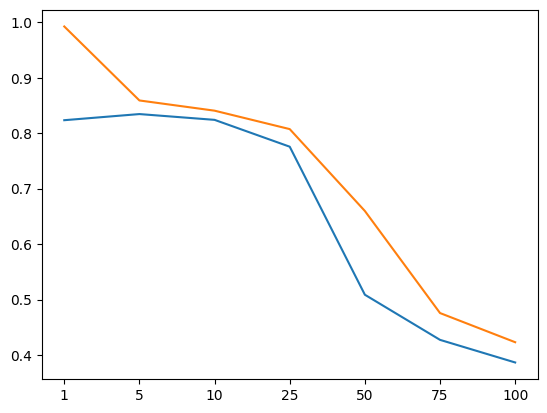

In [15]:
# Draw the plot for min_samples_leaf
fig = sns.lineplot(x=list(range(len(min_samples_leaf_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(min_samples_leaf_list))), y=trs_list)
fig.set_xticks(range(len(min_samples_leaf_list)))
fig.set_xticklabels(min_samples_leaf_list)

From the plot, we can see that the higher this parameter is, the lower the accuracy for both training and testing are.

## Multiple tuning

In [7]:
dict_param = {
    'max_depth' : np.asarray([100, 1000, 5000]),
    'min_samples_split': np.asarray([10, 100, 1000, 5000]),
    'min_samples_leaf': np.asarray([5, 25, 100]),
}

grid_search = GridSearchCV(DecisionTreeClassifier(), dict_param, cv = 5, n_jobs=8)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=8,
             param_grid={'max_depth': array([ 100, 1000, 5000]),
                         'min_samples_leaf': array([  5,  25, 100]),
                         'min_samples_split': array([  10,  100, 1000, 5000])})

In [11]:
df = pd.DataFrame(
  dict(
    max_depth = [val['max_depth'] for val in grid_search.cv_results_['params']],
    min_samples_split = [val['min_samples_split'] for val in grid_search.cv_results_['params']],
    min_samples_leaf = [val['min_samples_leaf'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)

df = df[df['score'] <= 0.83]

# print(df)
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 36 // len(dict_param[param]) :
      print(param, value)

max_depth 100
min_samples_split 5000
min_samples_leaf 25
min_samples_leaf 100


In [ ]:
df = pd.DataFrame(
  dict(
    max_depth = [val['max_depth'] for val in grid_search.cv_results_['params']],
    min_samples_split = [val['min_samples_split'] for val in grid_search.cv_results_['params']],
    min_samples_leaf = [val['min_samples_leaf'] for val in grid_search.cv_results_['params']],
    score = grid_search.cv_results_['mean_test_score']
  )
)

df = df[df['score'] <= 0.8]

# print(df)
for param in dict_param:
  for value in dict_param[param]:
    if len(df[df[param] == value]) == 36 // len(dict_param[param]) :
      print(param, value)

In [23]:
print(grid_search.best_estimator_, grid_search.best_score_)

DecisionTreeClassifier(max_depth=2500, min_samples_leaf=2,
                       min_samples_split=1000) 0.8385624999999999


## Max_leaf_nodes

In [10]:
# Setting the max_leaf_nodes range
max_leaf_nodes_list = [50, 100, 250, 500, 1000, 2000]
trs_list = list()
cvs_list = list()

for max_leaf_nodes in max_leaf_nodes_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(max_depth=2500, min_samples_leaf=2,
                       min_samples_split=1000, max_leaf_nodes=max_leaf_nodes)
  dt_model.fit(X_train_bow, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train_bow))
  cv_score = np.mean(cross_val_score(dt_model, X_train_bow, y_train, cv=5, n_jobs=8))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

[Text(0, 0, '50'),
 Text(1, 0, '100'),
 Text(2, 0, '250'),
 Text(3, 0, '500'),
 Text(4, 0, '1000'),
 Text(5, 0, '2000')]

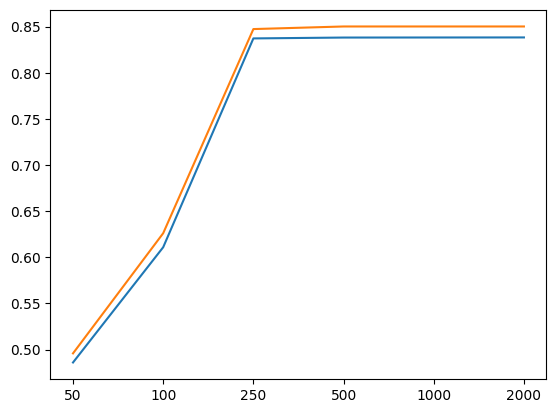

In [11]:
# Draw the plot for max_leaf_nodes
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=trs_list)
fig.set_xticks(range(len(max_leaf_nodes_list)))
fig.set_xticklabels(max_leaf_nodes_list)

The plot shows that it would be the most ideal for this parameter to be in the range (200, 500)

We will further examine this range by plotting it

In [12]:
# Setting the max_leaf_nodes range
max_leaf_nodes_list = [i for i in range(200, 501, 50)]
trs_list = list()
cvs_list = list()

for max_leaf_nodes in max_leaf_nodes_list:
  # Define model for each k
  dt_model = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
  dt_model.fit(X_train_bow, y_train)

  # Calculate the cross validation score
  train_score = accuracy_score(y_train, dt_model.predict(X_train_bow))
  cv_score = np.mean(cross_val_score(dt_model, X_train_bow, y_train, cv=5, n_jobs=8))
  
  trs_list.append(train_score)
  cvs_list.append(cv_score)

[Text(0, 0, '200'),
 Text(1, 0, '250'),
 Text(2, 0, '300'),
 Text(3, 0, '350'),
 Text(4, 0, '400'),
 Text(5, 0, '450'),
 Text(6, 0, '500')]

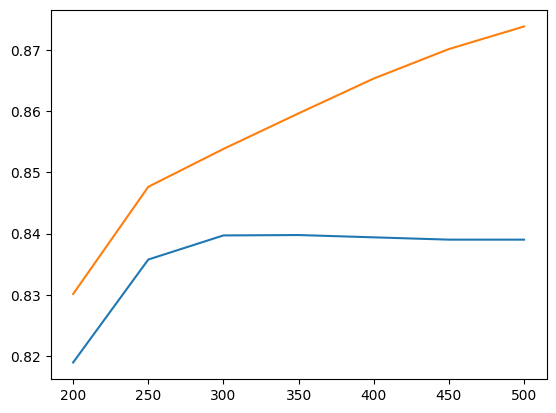

In [13]:
# Draw the plot for max_leaf_nodes
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=cvs_list)
fig = sns.lineplot(x=list(range(len(max_leaf_nodes_list))), y=trs_list)
fig.set_xticks(range(len(max_leaf_nodes_list)))
fig.set_xticklabels(max_leaf_nodes_list)

From the plot, we can see that this parameter should be near 300

After all the plotting, we will use GridSearchCV to find the best value for it

In [14]:
dict_param = {'max_leaf_nodes': [i for i in range(285, 316, 5)]}
best_max_leaf_nodes = GridSearchCV(DecisionTreeClassifier(max_depth=2500, min_samples_leaf=2, min_samples_split=1000), param_grid = dict_param, n_jobs = -1, cv = 10, scoring = 'accuracy')

best_max_leaf_nodes.fit(X_train_bow, y_train)

print("Best max leaf nodes parameter for decision tree:", best_max_leaf_nodes.best_params_)
data_best_max_leaf_nodes_y = best_max_leaf_nodes.predict(X_test_bow)
print("Accuracy of that model:", accuracy_score(data_best_max_leaf_nodes_y, y_test))

Best max leaf nodes parameter for decision tree: {'max_leaf_nodes': 310}
Accuracy of that model: 0.83675


So, the best max_leaf_nodes parameter is **310**

# Final Decision Tree

We use the parameters from the last section to define the model and then evaluate it

Score of on train are:
	- Accuracy score: 0.8501
	- Micro F1 score: 0.8501
	- Macro F1 score: 0.8148
Score of on test are:
	- Accuracy score: 0.8363
	- Micro F1 score: 0.8363
	- Macro F1 score: 0.8015


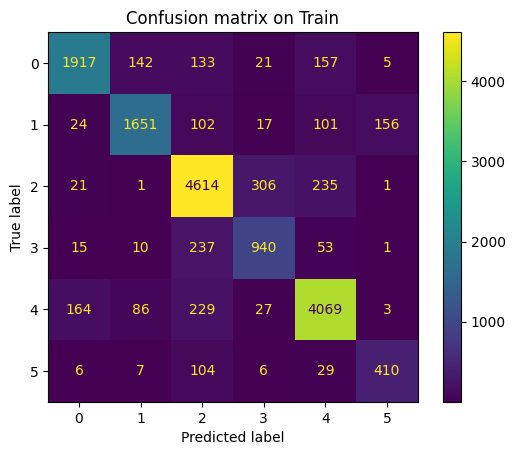

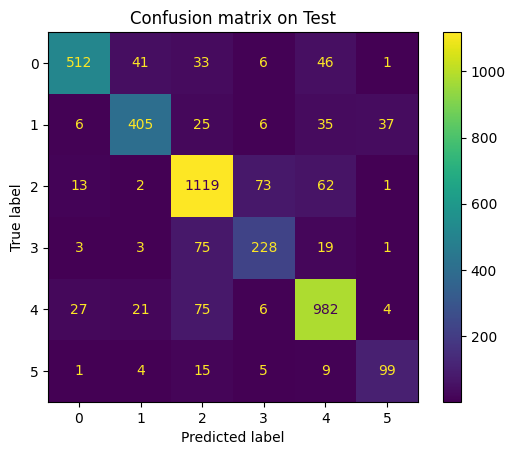

In [15]:
best_dt_model = DecisionTreeClassifier(max_depth=2500, min_samples_leaf=2, min_samples_split=1000, max_leaf_nodes=310)
best_dt_model.fit(X_train, y_train)

evaluate_model(best_dt_model, X_train, X_test, y_train, y_test, include_training=True)

We will draw the training curve of this Decision Tree model

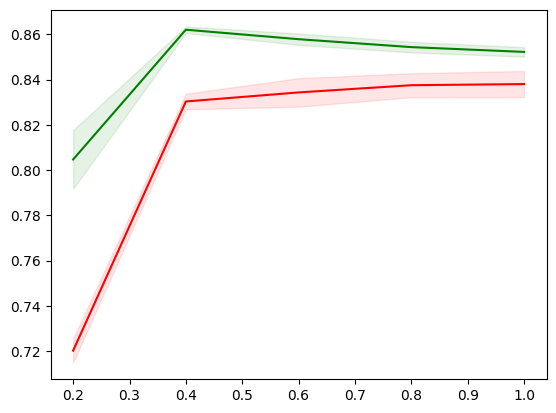

In [16]:
draw_learning_curve(best_dt_model, X_train, y_train)

# Export models

In [ ]:
directory = "data/models/"

dump(best_dt_model, directory + "best_dt_model_bow.joblib")